# Anomaly Detection Toolkit Hackathon: Starter Notebook
This notebook has been created to help you get a quick start on the data processing and to show you how we want you to submit your results to us. We encourage you strongly to think about how you might choose the best model for the task and how you might tune the hyperparameters of your model as well as doing some basic EDA.

In [2]:
# Let's load our libraries - add others you might want here
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import joblib

In [3]:
# Load in the training data - your test data has no labels
data = pd.read_csv('./data/ADT_training.csv')

# Model Fitting
Here we do some very basic model fitting with the data that we have. 

In [24]:
# Let's get a training and validation set for our data
train_X = data.iloc[:7000, 0].values
train_y = data.iloc[:7000, 1].values

val_X = data.iloc[7000:, 0].values
val_y = data.iloc[7000:, 1].values

In [7]:
val_X.shape

(1000,)

In [4]:
# We'll fit a very basic model
rf_model = RandomForestClassifier()
rf_model.fit(train_X.reshape(-1, 1), train_y)

RandomForestClassifier()

In [5]:
# Given you'll hand over the code to us, if training your model takes a while
# it might be best to pickle the model and share the trained model with us too
_ = joblib.dump(rf_model, 'my_model.pkl')

# Make predictions on the test set for data evaluation
We need to make predictions on the test set to submit the results for assessment. You can use the cells below as they are, except you will probably need to change the name of the model you use for making the predictions

In [6]:
# Load the test data 
test_data = pd.read_csv('./data/ADT_test.csv')
test_data.head(2)

test_X = test_data.data.values

In [7]:
# Make predictions with your model, one line at a time. This allows testing for the 
# Average Detection Delay
y_preds = []
for i in range(len(test_X)):
    y_pred = rf_model.predict(test_X[i].reshape(-1,1))
    y_preds.append(y_pred[0])


In [8]:
# Here is how you would write out the data to allow us to compare your results
test_results = pd.DataFrame(data={'results': y_preds})

# write them out to this file which you'll submit to us
test_results.to_csv('results_data_evaluation.csv')

In [ ]:
upper_limit = train_X.mean() + 3*train_X.std()
lower_limit = train_X.mean() - 3*train_X.std()
print("Highest allowed",upper_limit)
print("Lowest allowed",lower_limit)
train_X[(train_X > upper_limit) | (train_X < lower_limit)]
new_train_x = np.where(
    train_X>upper_limit,
    upper_limit,
    np.where(
        train_X<lower_limit,
        lower_limit,
        train_X
    )
)
pd.DataFrame(train_X).describe()
pd.DataFrame(new_train_x).describe()

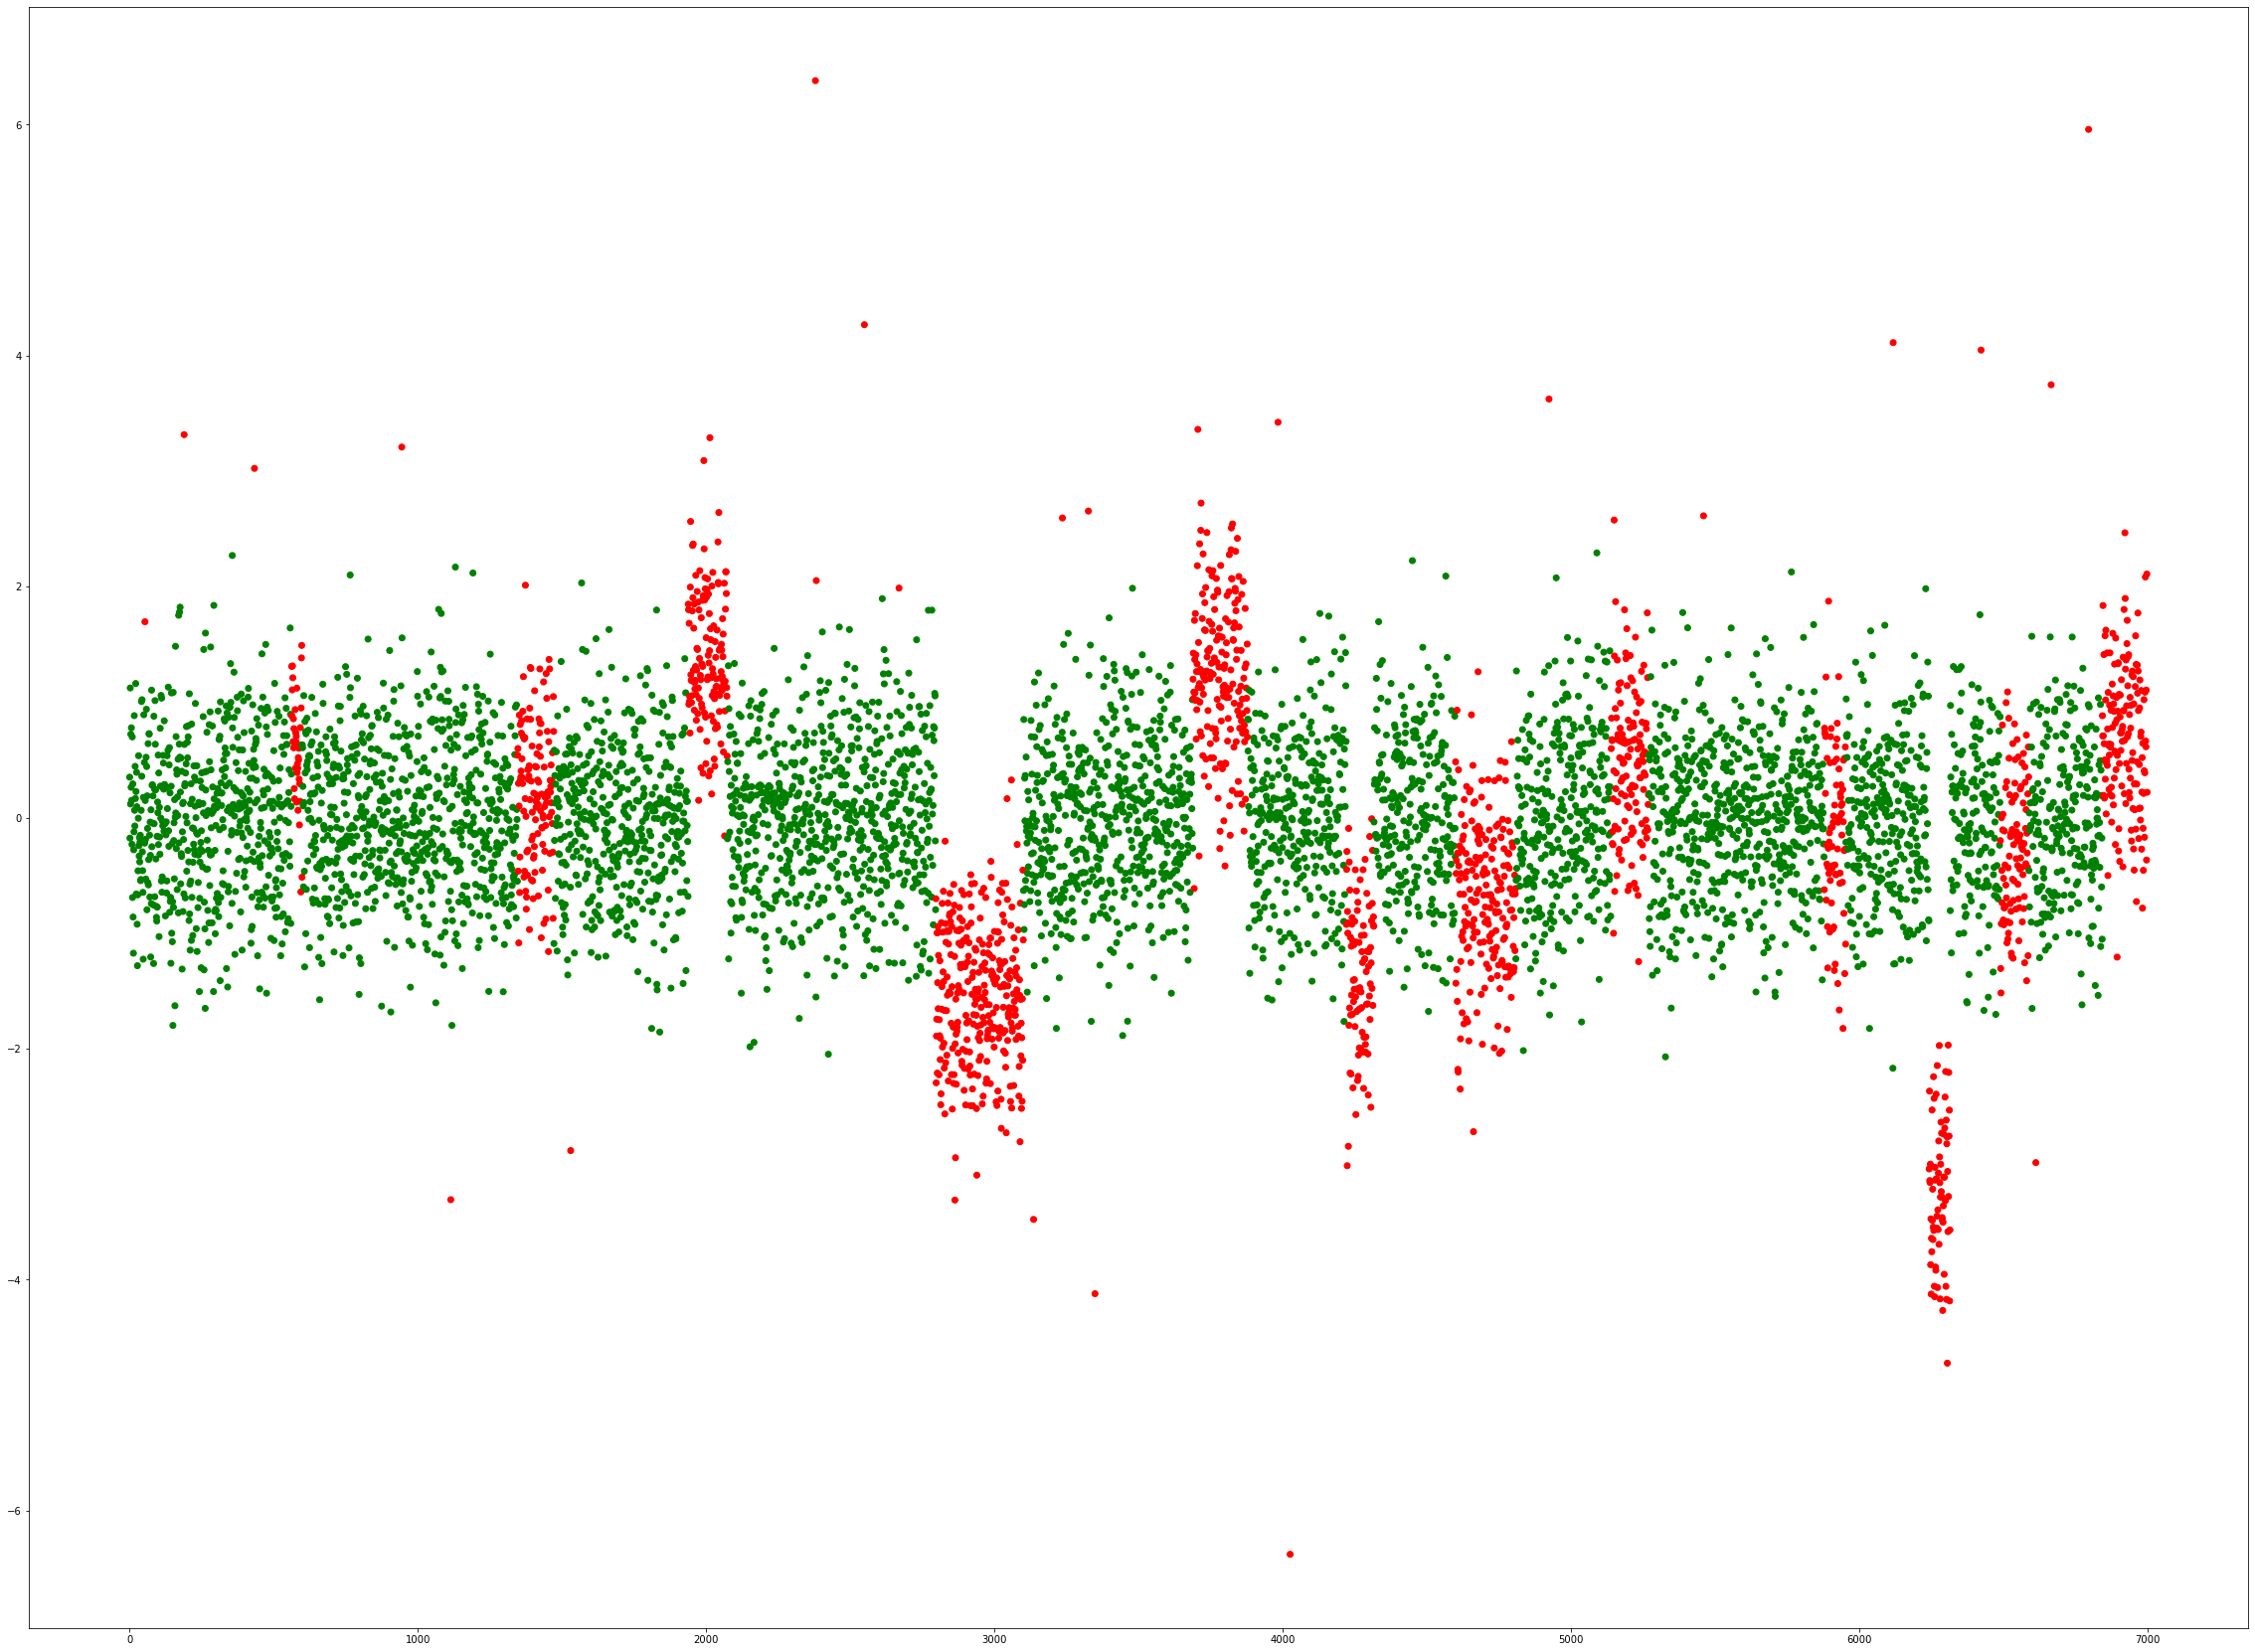

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 30))

color = np.where(train_y==1,'r','g')

plt.scatter(np.arange(len(train_X)), train_X, c=color)


In [73]:
# -*- coding: utf-8 -*-
"""Example of using ECOD for outlier detection
"""
# Author: Yue Zhao <zhaoy@cmu.edu>
# License: BSD 2 clause

from __future__ import division
from __future__ import print_function

import os
import sys

from pyod.models.ecod import ECOD
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

# train ECOD detector
clf_name = 'ECOD'
clf = ECOD()

# you could try parallel version as well.
# clf = ECOD(n_jobs=2)
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)

from sklearn.metrics import f1_score

f1_score_result = f1_score(y_test_pred, y_test)
print(f"{f1_score_result}")



On Training Data:
ECOD ROC:0.7613, precision @ rank n:0.5318

On Test Data:
ECOD ROC:0.7057, precision @ rank n:0.5315
0.45689655172413796


In [70]:
# -*- coding: utf-8 -*-
"""Example of using IForest for outlier detection
"""
# Author: Yue Zhao <zhaoy@cmu.edu>
# License: BSD 2 clause

from __future__ import division
from __future__ import print_function

import os
import sys

from pyod.models.iforest import IForest
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize


X_train = train_X[:-1000].reshape(-1, 1)
X_test = train_X[-1000:].reshape(-1, 1)
y_train = train_y[:-1000]
y_test = train_y[-1000:]

# train ECOD detector
clf_name = 'IForest'
clf = IForest()

# you could try parallel version as well.
# clf = ECOD(n_jobs=2)
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)

from sklearn.metrics import f1_score

f1_score_result = f1_score(y_test_pred, y_test)
print(f"{f1_score_result}")



On Training Data:
IForest ROC:0.758, precision @ rank n:0.545

On Test Data:
IForest ROC:0.6908, precision @ rank n:0.5285
0.4385964912280702


In [18]:
# -*- coding: utf-8 -*-
"""Example of using IForest for outlier detection
"""
# Author: Yue Zhao <zhaoy@cmu.edu>
# License: BSD 2 clause

from __future__ import division
from __future__ import print_function

import os
import sys

from pyod.models.iforest import IForest
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize


X_train = train_X[:-1000].reshape(-1, 1)
X_test = train_X[-1000:].reshape(-1, 1)
y_train = train_y[:-1000]
y_test = train_y[-1000:]

# train ECOD detector
clf_name = 'IForest'
clf = IForest()

# you could try parallel version as well.
# clf = ECOD(n_jobs=2)
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)

from sklearn.metrics import f1_score

f1_score_result = f1_score(y_test_pred, y_test)
print(f"{f1_score_result}")


array([0, 0, 0, ..., 1, 1, 1])

In [76]:

# -*- coding: utf-8 -*-
"""Example of using XGBOD for outlier detection
"""
# Author: Yue Zhao <zhaoy@cmu.edu>
# License: BSD 2 clause

from __future__ import division
from __future__ import print_function

import os
import sys

from pyod.models.xgbod import XGBOD
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize


X_train = train_X[:-1000].reshape(-1, 1)
X_test = train_X[-1000:].reshape(-1, 1)
y_train = train_y[:-1000]
y_test = train_y[-1000:]

# train ECOD detector
clf_name = 'XGBOD'
clf = XGBOD()

# you could try parallel version as well.
# clf = ECOD(n_jobs=2)
clf.fit(X_train, y_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)

from sklearn.metrics import f1_score

f1_score_result = f1_score(y_test_pred, y_test)
print(f"{f1_score_result}")


/Users/nguyehoa/opt/anaconda3/lib/python3.9/site-packages/pyod/models/base.py:410: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(
/Users/nguyehoa/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:05] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:37:05] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

On Training Data:
XGBOD ROC:0.8436, precision @ rank n:0.5874

On Test Data:
XGBOD ROC:0.6818, precision @ rank n:0.5195
0.45652173913043476


In [95]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.30)

model.fit(X_train)

y_pred = model.predict(X_test)
y_pred = (y_pred == -1).astype(int)

f1_score_result = f1_score(y_pred, y_test)
print(f"{f1_score_result}")

0.5295950155763239


In [23]:
# lstm model
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.utils import to_categorical
from matplotlib import pyplot

# load a single file as a numpy array

# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
	# load all train
	trainX, trainy = train_X, train_y
	print(trainX.shape, trainy.shape)
	# load all test
	testX, testy = val_X, val_y

	print(trainX.shape, trainy.shape, testX.shape, testy.shape)
	return trainX, trainy, testX, testy

# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy):
	verbose, epochs, batch_size = 0, 15, 64
	n_timesteps, n_features, n_outputs = trainX.shape[0], 1, trainy.shape[0]
	model = Sequential()
	model.add(LSTM(100, input_shape=(35, 1)))
	model.add(Dropout(0.5))
	model.add(Dense(100, activation='relu'))
	model.add(Dense(35, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit network
	model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
	# evaluate model
	_, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
	return accuracy

# summarize scores
def summarize_results(scores):
	print(scores)
	m, s = mean(scores), std(scores)
	print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

# run an experiment
def run_experiment(repeats=10):
	# load data
	trainX, trainy, testX, testy = load_dataset()
	# repeat experiment
	scores = list()
	for r in range(repeats):
		score = evaluate_model(trainX, trainy, testX, testy)
		score = score * 100.0
		print('>#%d: %.3f' % (r+1, score))
		scores.append(score)
	# summarize results
	summarize_results(scores)

# run the experiment
run_experiment()

(200, 35, 1) (200, 35, 1)
(200, 35, 1) (200, 35, 1) (200, 5, 1) (200, 5, 1)


ValueError: in user code:

    File "/Users/nguyehoa/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "/Users/nguyehoa/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/nguyehoa/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "/Users/nguyehoa/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 998, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/Users/nguyehoa/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1092, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/Users/nguyehoa/opt/anaconda3/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 605, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/Users/nguyehoa/opt/anaconda3/lib/python3.9/site-packages/keras/utils/metrics_utils.py", line 77, in decorated
        update_op = update_state_fn(*args, **kwargs)
    File "/Users/nguyehoa/opt/anaconda3/lib/python3.9/site-packages/keras/metrics/base_metric.py", line 143, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "/Users/nguyehoa/opt/anaconda3/lib/python3.9/site-packages/keras/metrics/base_metric.py", line 700, in update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/nguyehoa/opt/anaconda3/lib/python3.9/site-packages/keras/metrics/metrics.py", line 3669, in sparse_categorical_accuracy
        matches = metrics_utils.sparse_categorical_matches(y_true, y_pred)
    File "/Users/nguyehoa/opt/anaconda3/lib/python3.9/site-packages/keras/utils/metrics_utils.py", line 962, in sparse_categorical_matches
        y_true = tf.squeeze(y_true, [-1])

    ValueError: Can not squeeze dim[1], expected a dimension of 1, got 35 for '{{node Squeeze}} = Squeeze[T=DT_FLOAT, squeeze_dims=[-1]](remove_squeezable_dimensions/Squeeze)' with input shapes: [?,35].


In [29]:

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_X, val_X, train_y, val_y
# fit model no training data
model = XGBClassifier()
model.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


 
from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score
train_x = train_X
upper_limit = train_x.mean() + 3*train_x.std()
lower_limit = train_x.mean() - 3*train_x.std()
# taking out the outliers
new_train_x = np.where(
    train_x>upper_limit,
    upper_limit,
    np.where(
        train_x<lower_limit,
        lower_limit,
        train_x
    )
)
# running the model
model = IsolationForest(contamination=0.30)
model.fit(new_train_x.reshape(-1, 1))
y_pred = model.predict(val_x.reshape(-1, 1))
y_pred = (y_pred == -1).astype(int)
f1_score_result = f1_score(y_pred, val_y)
print(f"{f1_score_result}")







from sklearn.metrics import f1_score

f1_score_result = f1_score(y_pred, y_test)
print(f"{f1_score_result}")

/Users/nguyehoa/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/nguyehoa/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nguyehoa/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

[13:10:51] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 79.50%
0.5265588914549654


7000

In [89]:
test = (y_pred == -1).astype(int)

In [98]:
train_X.shape

(7000,)

In [80]:
np.unique(train_y, return_counts=True)[1][1] / np.unique(train_y, return_counts=True)[1][0]

0.30939019827908715